### PyTorch Tutorial 1

The content in this notebook was adapted from the content available at the intro tutorial from the the "official" PyTorch Tutorials Site, located at:

https://pytorch.org/tutorials/index.html

There is a video session at YouTube for those who would like to watch it.

The URL is

https://www.youtube.com/watch?v=IC0_FRiX-sw

At the end, we will expand the content by defining a NeuralNet Model for processing the MINST Digits data using Dense and ConvNet layers.


## Basic Torch

Step one is to import Torch and do basic tensor operations

In [1]:
import torch

# z is a (5,3) tensor of Torch's default type (torch.float32)
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [2]:
# i is a (5,3) tensor of shape (5,3) of type torch.int16, filled with ones
i = torch.ones((5, 3), dtype=torch.int16)
print(i)


tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


## Init learning weights with random values

It is a common practice to initialize the learning weights with random values.
This is often done by using a specific seed for the PRNG (pseudo random number generator)
for reproducibility of results:
 


In [3]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('R1 is a random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nR2 is a different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nR3 should match R1:')
print(r3) # repeats values of r1 because of re-seed

print('\nIllustrating the fact that the random generator is not so random after all')



R1 is a random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

R2 is a different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

R3 should match R1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

Illustrating the fact that the random generator is not so random after all


## Tensor Operations

An overview of tensor operations can be found at

https://docs.google.com/presentation/d/1SjYGyzzUU47m0E70LqW8wVYhfBBrLZW4xfTcV1-UKSw/edit#slide=id.g3268a1ce068_0_0

We saw how tensors can be added, multiplied etc.

PyTorch (and TF) support tensor to tensor operations and tensor to/from scalars


In [4]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# uncomment this line to get a runtime error
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [5]:

# Small sample of common mathematical operations available in Torch

r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations
print('\nAbsolute value of r:')
print(torch.abs(r))

# trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# linear algebra ops
print('\nDeterminant of r:')
print(torch.det(r))

print('\nSingular value decomposition of r:')
print(torch.svd(r))

# statistical and aggregate ops
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))

print('\nMaximum value of r:')
print(torch.max(r))

# There are several, more advaced tensor ops, including how to set them up for parallel computations on GPU


A random matrix, r:
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

Absolute value of r:
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

Inverse sine of r:
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])

Determinant of r:
tensor(-0.5703)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([1.1793, 0.4836]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))

Average and standard deviation of r:
(tensor(0.7217), tensor(0.1247))

Maximum value of r:
tensor(0.9956)


# PyTorch Models

The video at the link below shows how to create a model with PyTorch.

The specific model creation starts at minute 10:00 (600s) of the video

https://www.youtube.com/watch?v=IC0_FRiX-sw&t=600s

The code in the slides that follow shows how to create the "LeNet" model, which was used by Yann Lecun et al
to process the MNIST digits data set

Since that model is complex, we start with a simpler mode, based on Dense layers.


In [8]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

In [9]:
# Define a NN model with dense layers (which Pytorch calls "Linear").
# The model can be used to process the MNIST-digits data 

# Determine what device (GPU, CPU, MPS) is available for training

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define Dense Model
class DenseNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

dense_model = DenseNet().to(device)
print(dense_model)

Using cuda device
DenseNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


![alt text](PytorchDense.drawio.svg)

In [14]:
# Get APIs for optimizer, scheduler and datasets
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

In [15]:
# Another way to define the NN. 
# self.fc1 stands for "fully connected" layer
class DenseNet2(nn.Module):
    def __init__(self):
        super(DenseNet2, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)  # Input layer (784 features)
        self.fc2 = nn.Linear(512, 512)   # Hidden layer
        self.fc3 = nn.Linear(512, 10)    # Output layer (10 classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten the image
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x



In [17]:

# Get the data
datDir = "/drv3/hm3/code/python/torch/code/data/MNIST"
# Download and transform the MNIST dataset
train_dataset = datasets.MNIST(
    root= datDir, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
)

test_dataset = datasets.MNIST(
    root=datDir, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Instantiate the model, optimizer, and loss function
model = DenseNet2()
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100.0%


Extracting /drv3/hm3/code/python/torch/code/data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /drv3/hm3/code/python/torch/code/data/MNIST/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100.0%


Extracting /drv3/hm3/code/python/torch/code/data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /drv3/hm3/code/python/torch/code/data/MNIST/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100.0%


Extracting /drv3/hm3/code/python/torch/code/data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /drv3/hm3/code/python/torch/code/data/MNIST/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100.0%

Extracting /drv3/hm3/code/python/torch/code/data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /drv3/hm3/code/python/torch/code/data/MNIST/MNIST/raw



In [18]:

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Instantiate the model, optimizer, and loss function
model = DenseNet2()
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Define the training loop
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

# Define the testing loop
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# Train the model
for epoch in range(1, 10 + 1):  # Train for 10 epochs
    train(epoch)
    test()


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.318707
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.333676
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.298095
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.272843
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.074279
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.189639
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.139207
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.140568
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.024073
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.090207

Test set: Average loss: 0.0001, Accuracy: 9669/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.282269
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.030261
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.016592
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.050781
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.074543
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.084592
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.063761
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.050633
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.106878
T

## Evaluating Performance

The model accuracy is really good. 

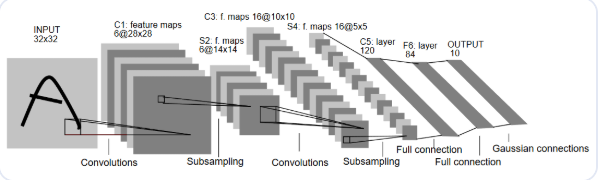